# ВВЕДЕНИЕ
### <span style="opacity: 0.5;">*INTRODUCTION*</span>
Набор рукописных цифр MNIST - это широко используемый набор данных, который обычно применяется в области компьютерного зрения и машинного обучения. Он состоит из набора изображений рукописных цифр от 0 до 9, записанных от руки.<br>Набор данных MNIST состоит из двух частей: обучающего набора и тестового набора. Обучающий набор содержит 60 000 изображений, а тестовый набор содержит 10 000 изображений. Все изображения имеют размер 28x28 пикселей и представлены в оттенках серого.<br><br><span style="opacity: 0.5;">*The MNIST handwritten digit set is a widely used dataset that is commonly applied in the field of computer vision and machine learning. It consists of a set of images of handwritten digits from 0 to 9.<br>The MNIST dataset consists of two parts: a training set and a test set. The training set contains 60,000 images and the test set contains 10,000 images. All images are 28x28 pixels and are in grayscale.*</span>

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

# 1. Озбор набора данных
### <span style="opacity: 0.5;">*1. Overview the Dataset*</span>

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Посмотрим, как выглядят тренировочные данные, а также распределение классов цифр между собой.<br><span style="opacity: 0.5;">*See how the training data looks like, as well as the distribution of digit classes among themselves.*</span>

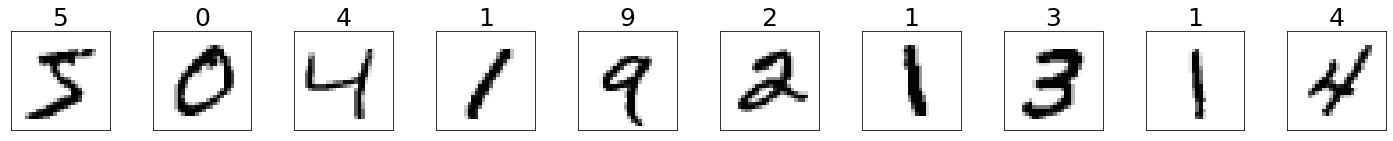

In [16]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    ax.imshow((255 - X_train[idx]), cmap='gray')
    ax.set_title(str(y_train[idx]), fontsize=25)

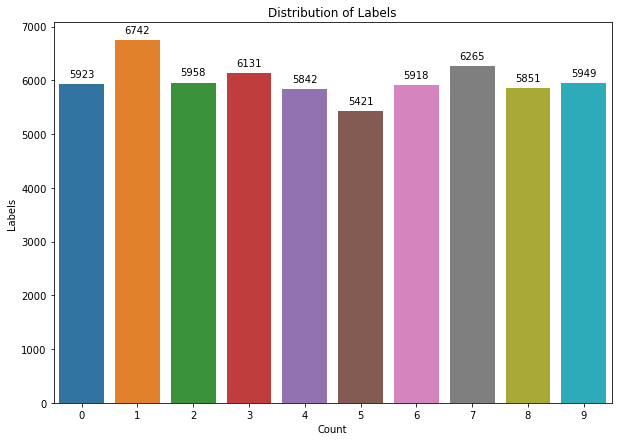

In [17]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(y_train)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Distribution of Labels')
plt.show()

# 2. Преобразование и нормализация
### <span style="opacity: 0.5;">*2. Transformation and normalization*</span>
Нормализация и преобразование изображений в более удобный формат.<br><span style="opacity: 0.5;">*Normalization and conversion of images to a more convenient format.*</span>

In [18]:
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

In [19]:
y_train = to_categorical(y_train) # <class 'numpy.ndarray'> 
y_test = to_categorical(y_test)   # <class 'numpy.ndarray'>

In [20]:
print(y_train[0]) # 5
print(y_train[3]) # 1

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# 3. Построение модели
### <span style="opacity: 0.5;">*3. Model building*</span>

In [21]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Обучение модели
### <span style="opacity: 0.5;">*4. Model fitting*</span>

Мы будем использовать CPU, так как использование GPU бессмысленно. Модель не производит огромных вычислений.<br><span style="opacity: 0.5;">*We use the CPU, since using the GPU is pointless. The model does not perform huge calculations.*</span>

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=15,
)

Epoch 1/15
235/235 [==============================] - 5s 5ms/step - loss: 0.4317 - accuracy: 0.8821 - val_loss: 0.2298 - val_accuracy: 0.9354
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1986 - accuracy: 0.9432 - val_loss: 0.1662 - val_accuracy: 0.9502
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9584 - val_loss: 0.1355 - val_accuracy: 0.9600
Epoch 4/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1183 - accuracy: 0.9664 - val_loss: 0.1198 - val_accuracy: 0.9635
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9716 - val_loss: 0.1019 - val_accuracy: 0.9702
Epoch 6/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9771 - val_loss: 0.0923 - val_accuracy: 0.9710
Epoch 7/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9802 - val_loss: 0.0880 - val_accuracy: 0.9734
Epoch 

Преобразование истории обучения в датафрейм.<br><span style="opacity: 0.5;">*Converting the learning history to a dataframe.*</span>

In [24]:
history_df = pd.DataFrame(history.history)

# 5. Анализ модели
### <span style="opacity: 0.5;">*5. Model analysis*</span>

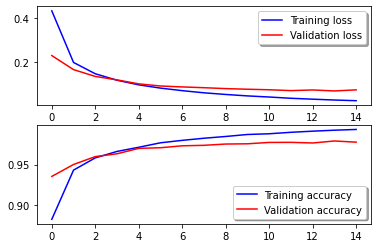

In [25]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# 6. Прогнозирование тестовых данных
### <span style="opacity: 0.5;">*6. Predicting the test data*</span>

In [26]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [14]:
for i in range(10):
    print(f"{i}\t{y_pred[0][i]:.4f}\t{y_test[0][i]:.2f}")

0	0.0000	0.00
1	0.0000	0.00
2	0.0000	0.00
3	0.0007	0.00
4	0.0000	0.00
5	0.0000	0.00
6	0.0000	0.00
7	0.9993	1.00
8	0.0000	0.00
9	0.0000	0.00


Отобразим матрицу ошибок, на которой отмечены действительные (Truth) и предсказанные (Predicted) значения.<br><span style="opacity: 0.5;">*Display the confusion matrix which Truth and Predicted values are marked.*</span>

Text(87.0, 0.5, 'Truth')

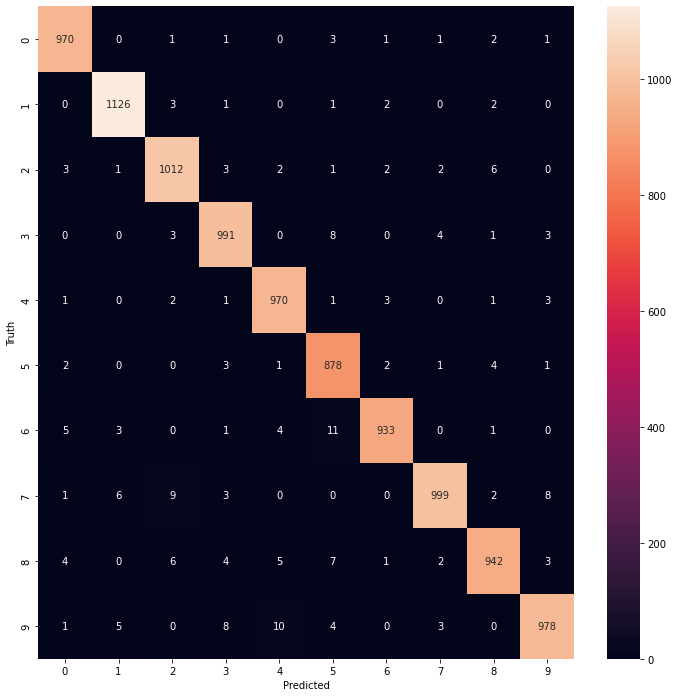

In [15]:
cm = tf.math.confusion_matrix(labels=y_test.argmax(1), predictions=y_pred.argmax(1))
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
report = classification_report(y_test.argmax(1), y_pred.argmax(1))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Посмотрим на несколько рукописных цифр, которые модель распознала ошибочно.<br><span style="opacity: 0.5;">*Look at a few handwritten numbers that the model misrecognised.*</span>

In [17]:
confuse = 0
confused_list = []
idx = 0

while confuse < 10:
    if y_test.argmax(1)[i] != y_pred.argmax(1)[i]:
        confuse += 1
        confused_list.append(i)
    i += 1

print(confused_list)

[149, 247, 321, 340, 445, 495, 582, 619, 684, 691]


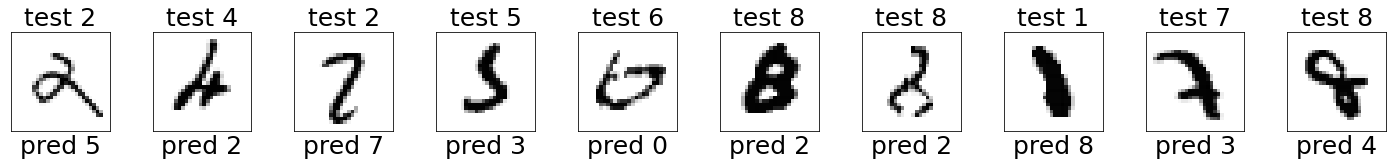

In [18]:
fig = plt.figure(figsize=(25, 4))

for idx, image_idx in enumerate(confused_list):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    ax.imshow(1 - X_test[image_idx], cmap='gray')
    ax.set_title('test ' + str(y_test.argmax(1)[image_idx]), fontsize=25)
    ax.set_xlabel('pred ' + str(y_pred.argmax(1)[image_idx]), fontsize=25)

plt.show()

В некоторых случаях даже человек не способен распознать числа, несмотря на то, что модель ещё недообучена.<br><span style="opacity: 0.5;">*In some cases, even a person is not able to recognize numbers, despite the fact that the model is still underfitted.*</span>

# ЗАКЛЮЧЕНИЕ
### <span style="opacity: 0.5;">*CONCLUSION*</span>

Данная модель имеет, казалось бы, высокую точность, но на самом деле нейронная сеть требует улучшений, а данные требуют увеличения путём применения различных преобразований, таких как масштабирования, вращения, отражения, обрезки и др.<br>В  ближайшее время будет применена разработанная в 1998 году модель LeNet-5. Она отлично подходит для различных классов объектов небольшого расширения.<br>Чтобы следить за обновлениями данного проекта, подписывайтесь на мой <a href="https://github.com/TheTIMOSHA">GitHub</a>.<br><br><span style="opacity: 0.5;">*This model has seemingly high accuracy, but in fact, the neural network needs to be improved, and the data needs to be increased by applying various transformations, such as scaling, rotation, reflection, cropping, etc.<br>In the near future, the developed in 1998 model LeNet-5. It's great for various small extension object classes.<br>To stay tuned for this project, follow my*</span> <a href="https://github.com/TheTIMOSHA">*GitHub</a>.*